In [15]:
import pandas as pd

# Load your data
df = pd.read_csv('data/latency/bq-results-20250505-125502-1746449717486.csv')  # Replace with actual filename

# Parse both timestamp columns
df['origin_timestamp'] = pd.to_datetime(df['origin_block_timestamp'])
df['destination_timestamp'] = pd.to_datetime(df['destination_block_timestamp'])

# Calculate latency in seconds
df['latency_sec'] = (df['destination_timestamp'] - df['origin_timestamp']).dt.total_seconds()

In [74]:
df['latency_sec'].describe()

count    5.389336e+06
mean     5.262038e+01
std      1.408948e+02
min      0.000000e+00
25%      2.000000e+01
50%      2.900000e+01
75%      4.200000e+01
max      3.600000e+03
Name: latency_sec, dtype: float64

In [34]:
df[df['latency_sec'] < 0]

,msg_id,origin,origin_block_timestamp,destination,destination_block_timestamp,asset,route_id,origin_timestamp,destination_timestamp,latency_sec,hour
26521,0x7183ddfff8393d24054bfc162d9c893b6fe28f2797c6...,optimism,2025-03-20 23:01:25 UTC,zeronetwork,2025-03-20 23:01:13 UTC,ethereum,ethereum/optimism-zeronetwork,2025-03-20 23:01:25+00:00,2025-03-20 23:01:13+00:00,-12.0,23.0
26525,0x7966d65bd649504b37b6d6305445e198fc3b38eb8af9...,bsc,2025-03-23 18:37:54 UTC,zeronetwork,2025-03-23 18:37:17 UTC,binancecoin,binancecoin/bsc-zeronetwork,2025-03-23 18:37:54+00:00,2025-03-23 18:37:17+00:00,-37.0,18.0
29167,0x653236b1818524a4a1ede666ef213fdd7bb27a88a6fa...,blast,2025-02-22 03:54:05 UTC,zeronetwork,2025-02-22 03:53:36 UTC,usdb,usdb/blast-zeronetwork,2025-02-22 03:54:05+00:00,2025-02-22 03:53:36+00:00,-29.0,3.0
35548,0xe7c651b7ef13a83f6867c0714a6dbbbad4cbe2ad1c95...,blast,2025-01-22 01:50:05 UTC,zeronetwork,2025-01-22 01:49:10 UTC,usdb,usdb/blast-zeronetwork,2025-01-22 01:50:05+00:00,2025-01-22 01:49:10+00:00,-55.0,1.0
38408,0x162f430b738e48eab030c0781f1ba0a42a41635c10f7...,arbitrum,2024-10-28 18:57:53 UTC,zircuit,2024-10-28 18:57:49 UTC,renzo-restaked-eth,renzo-restaked-eth/arbitrum-zircuit,2024-10-28 18:57:53+00:00,2024-10-28 18:57:49+00:00,-4.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
5356574,0x8eedac0ebd42fa92a8599756d1e891c8255be40f0c41...,arbitrum,2025-01-06 10:42:14 UTC,treasure,2025-01-06 10:42:08 UTC,magic,magic/arbitrum-treasure,2025-01-06 10:42:14+00:00,2025-01-06 10:42:08+00:00,-6.0,10.0
5356581,0xd91c3f368ee7614cca7354619dc2ec92134f7b64d1a4...,arbitrum,2025-01-06 08:16:53 UTC,treasure,2025-01-06 08:16:52 UTC,magic,magic/arbitrum-treasure,2025-01-06 08:16:53+00:00,2025-01-06 08:16:52+00:00,-1.0,8.0
5356583,0x4f09544d75186ddc2a201d36a0cf20a9a550700aa3e0...,arbitrum,2025-01-01 18:28:08 UTC,treasure,2025-01-01 18:27:41 UTC,magic,magic/arbitrum-treasure,2025-01-01 18:28:08+00:00,2025-01-01 18:27:41+00:00,-27.0,18.0
5356585,0x2f460baf41c0fc2c21650c50b7fc6d45dd2099621a7b...,arbitrum,2025-01-04 23:49:10 UTC,treasure,2025-01-04 23:48:53 UTC,magic,magic/arbitrum-treasure,2025-01-04 23:49:10+00:00,2025-01-04 23:48:53+00:00,-17.0,23.0


In [72]:
df[df['latency_sec'] < 0]['destination'].unique()

array([], dtype=object)

In [45]:
df = df[df['latency_sec'] >= 0]  # Remove negative latencies

In [54]:
df = df[df['latency_sec'] <= 3600]  # Remove latencies greater than 1 hour, because they are likely errors

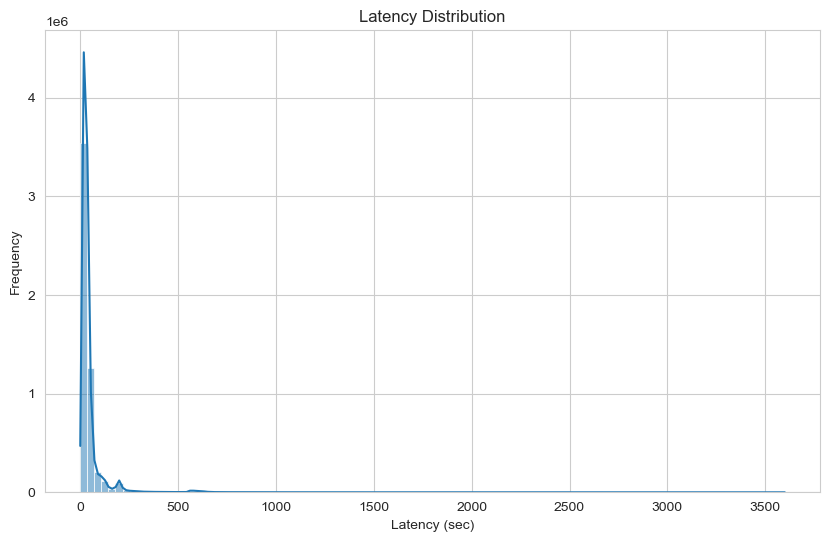

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['latency_sec'], bins=100, kde=True)
plt.title("Latency Distribution")
plt.xlabel("Latency (sec)")
plt.ylabel("Frequency")
plt.show()


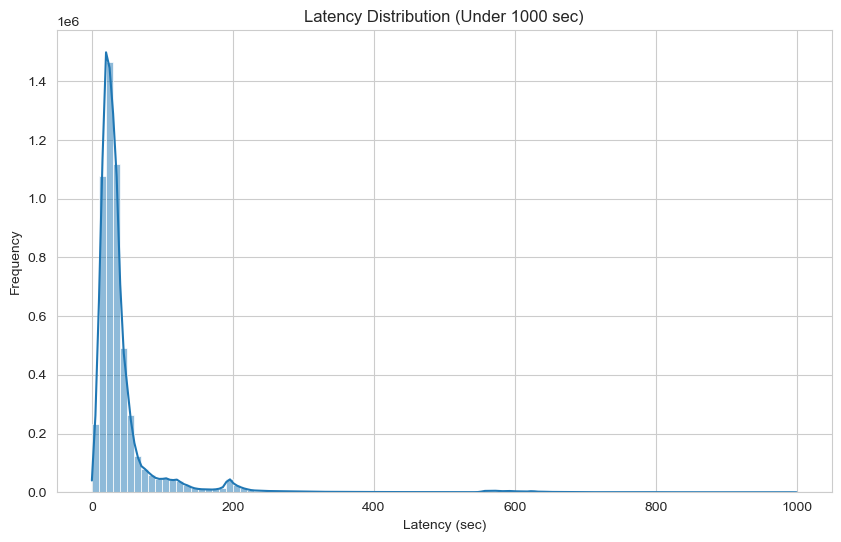

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['latency_sec'] < 1000]['latency_sec'], bins=100, kde=True)
plt.title("Latency Distribution (Under 1000 sec)")
plt.xlabel("Latency (sec)")
plt.ylabel("Frequency")
plt.show()


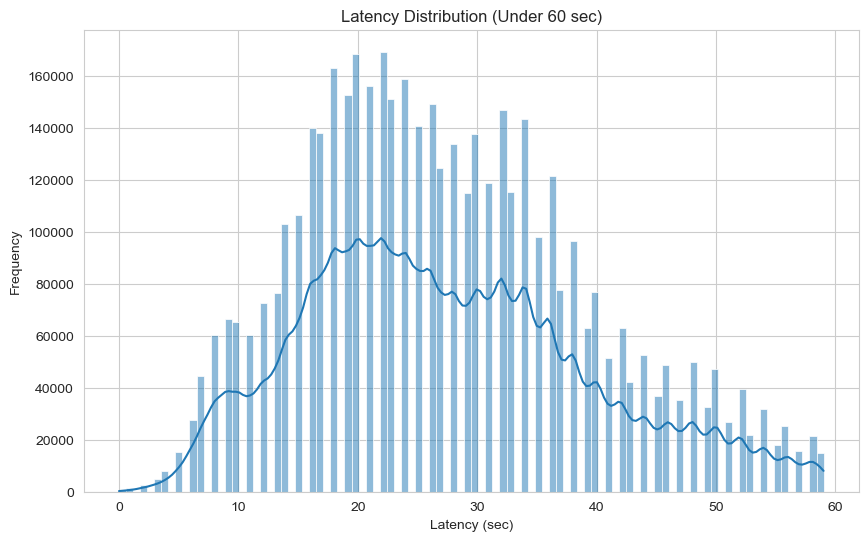

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['latency_sec'] < 60]['latency_sec'], bins=100, kde=True)
plt.title("Latency Distribution (Under 60 sec)")
plt.xlabel("Latency (sec)")
plt.ylabel("Frequency")
plt.show()

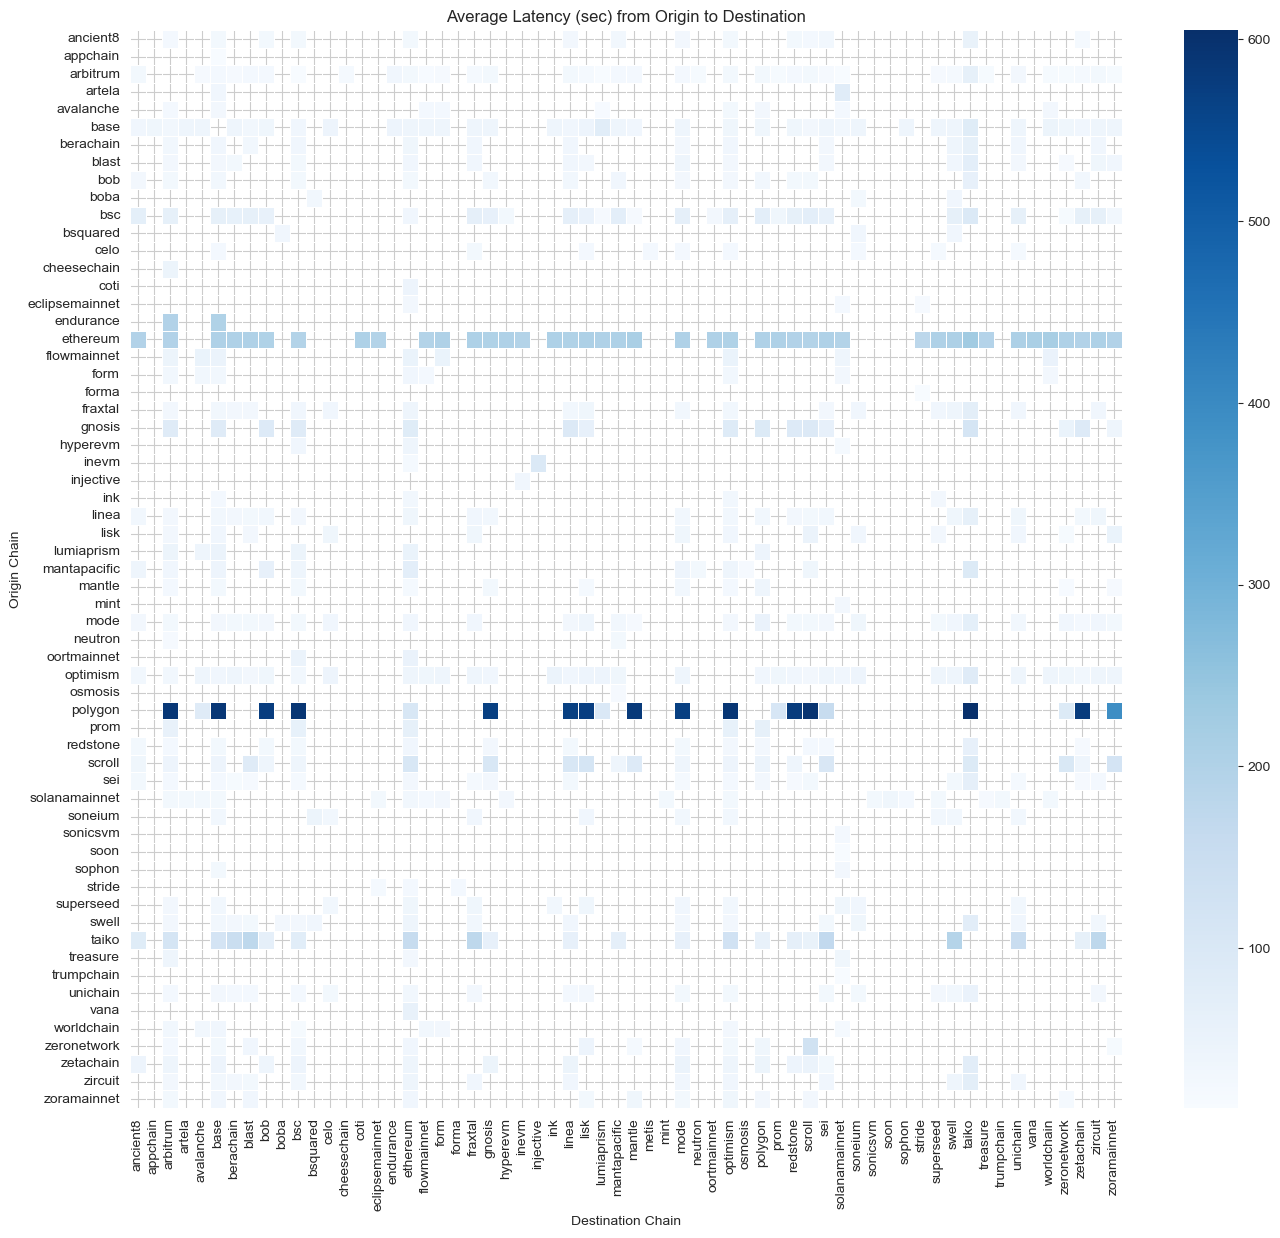

In [62]:
# Pivot the data
heatmap_data = df.pivot_table(
    values='latency_sec',
    index='origin',
    columns='destination',
    aggfunc='median'
)

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(heatmap_data, fmt="d", cmap="Blues", linewidths=.5)
plt.title("Average Latency (sec) from Origin to Destination")
plt.xlabel("Destination Chain")
plt.ylabel("Origin Chain")
plt.show()


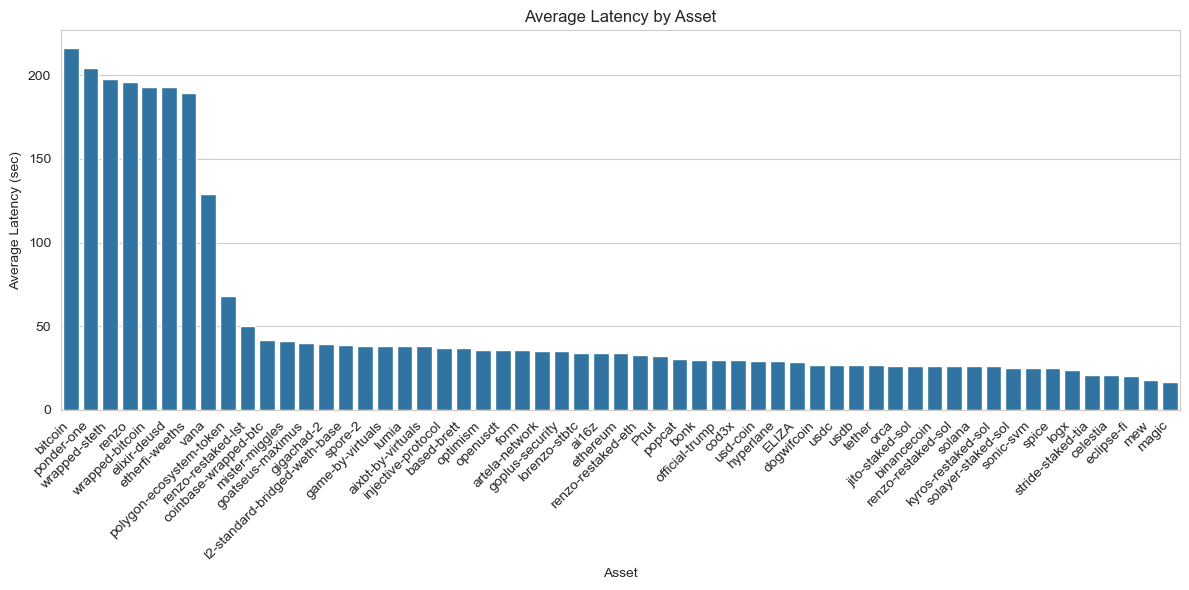

In [63]:
# Group by asset and calculate mean latency
asset_latency = df.groupby('asset')['latency_sec'].median().sort_values(ascending=False)

# Display as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=asset_latency.index, y=asset_latency.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Latency by Asset")
plt.ylabel("Average Latency (sec)")
plt.xlabel("Asset")
plt.tight_layout()
plt.show()


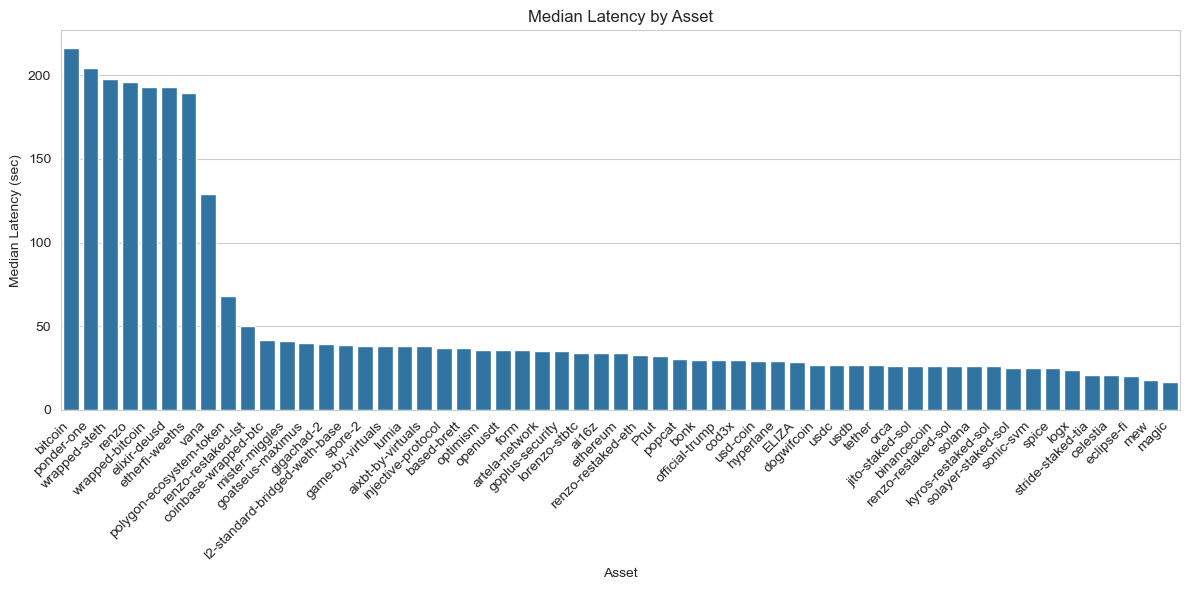

In [65]:
# Group by asset and calculate median latency
asset_latency = df.groupby('asset')['latency_sec'].median().sort_values(ascending=False)

# Display as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=asset_latency.index, y=asset_latency.values)
plt.xticks(rotation=45, ha='right')
plt.title("Median Latency by Asset")
plt.ylabel("Median Latency (sec)")
plt.xlabel("Asset")
plt.tight_layout()
plt.show()

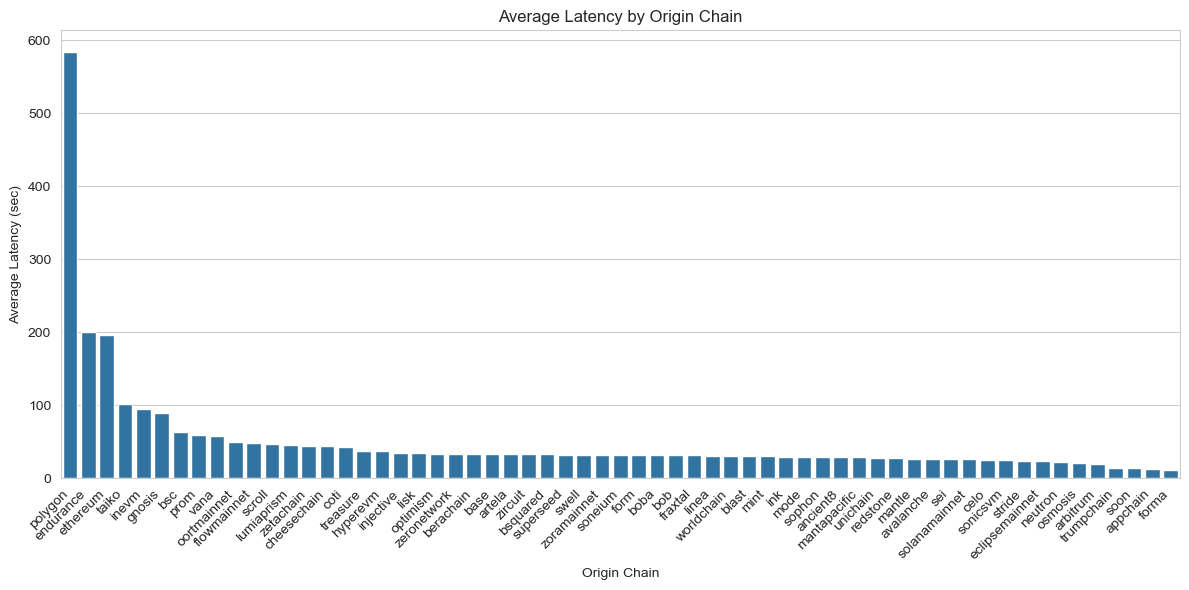

In [66]:
origin_latency = df.groupby('origin')['latency_sec'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=origin_latency.index, y=origin_latency.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Latency by Origin Chain")
plt.ylabel("Average Latency (sec)")
plt.xlabel("Origin Chain")
plt.tight_layout()
plt.show()


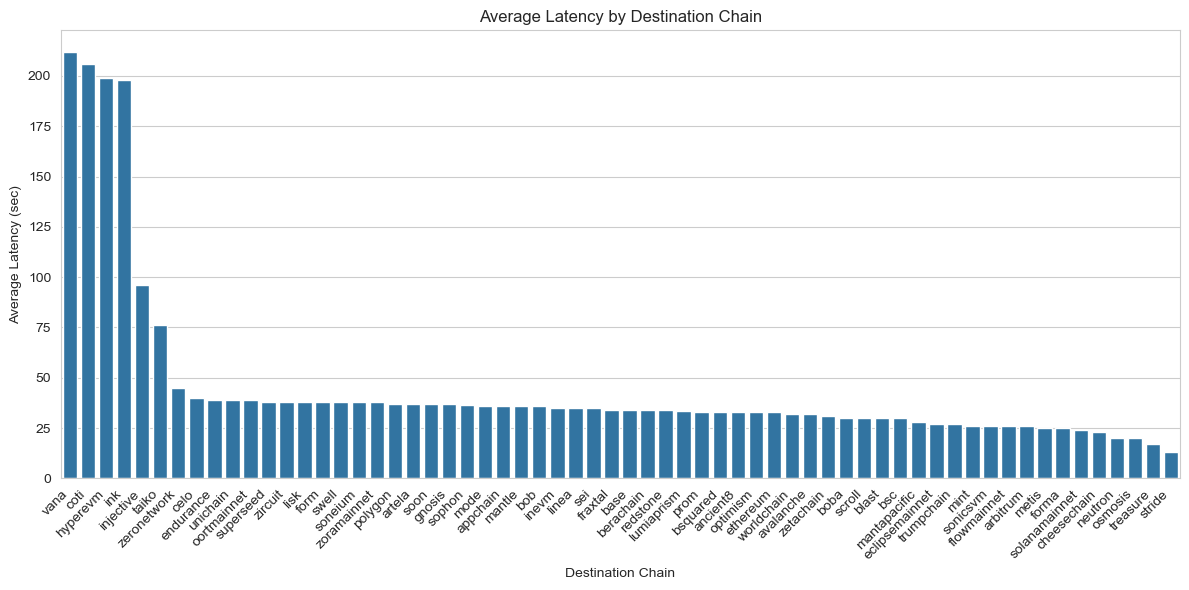

In [67]:
destination_latency = df.groupby('destination')['latency_sec'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=destination_latency.index, y=destination_latency.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Latency by Destination Chain")
plt.ylabel("Average Latency (sec)")
plt.xlabel("Destination Chain")
plt.tight_layout()
plt.show()